Saved in: diag1.png


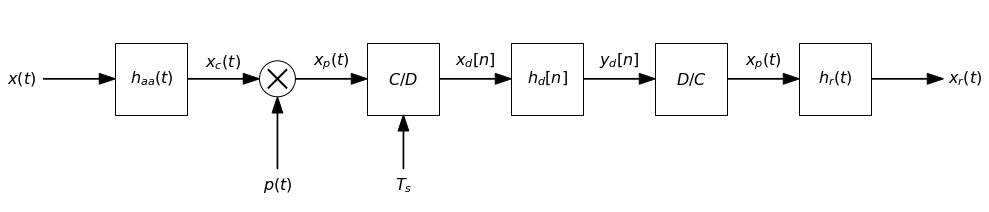

In [1]:
from blockdiag import DiagramBuilder

db = DiagramBuilder(block_length=1, fontsize=16)

# Dibujo del diagrama
pos = db.add("x(t)", kind="input", position=(0, 0))
pos = db.add("h_{aa}(t)", kind="block", position = pos)
pos = db.add("mult", kind="2combiner", input_left_text="x_c(t)", input_bottom_text="p(t)", output_text="x_p(t)", operation='mult', position = pos)
pos = db.add("C/D", kind="block_uparrow",input_bottom_text="T_s", position = pos)
pos = db.add("x_d[n]", kind="arrow", position = pos)
pos = db.add("h_d[n]", kind="block", position = pos)
pos = db.add("y_d[n]", kind="arrow", position = pos)
pos = db.add("D/C", kind="block", position = pos)
pos = db.add("x_p(t)", kind="arrow", position = pos)
pos = db.add("h_r(t)", kind="block", position = pos)
pos = db.add("x_r(t)", kind="output", position = pos)

db.show(savepath = "diag1.png")

Saved in: diag2.png


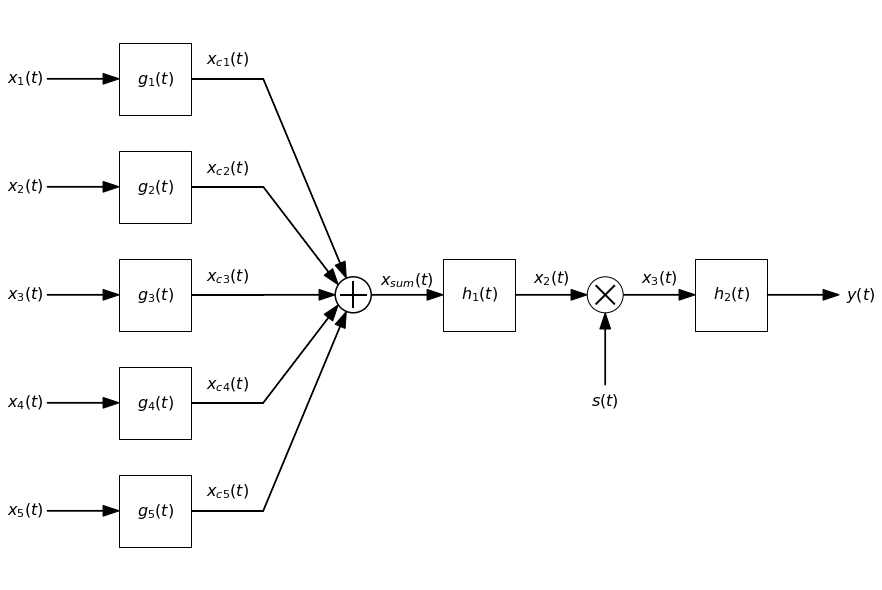

In [9]:
from blockdiag import DiagramBuilder
import numpy as np

db = DiagramBuilder(block_length=1, fontsize=16)

y_pos = np.linspace(3, -3, 5)
x_pos = np.zeros_like(y_pos)
inputs_pos = np.column_stack((x_pos, y_pos))

# Input branches
for cont in np.arange(inputs_pos.shape[0]):
    name = "x_" + str(cont + 1) +"(t)"
    inputs_pos[cont] = db.add(name, kind="input", position=(inputs_pos[cont]))
    name =  "g_" + str(cont + 1) +"(t)"
    inputs_pos[cont] = db.add(name, kind="block", position=(inputs_pos[cont]))
    name = "x_{c" + str(cont + 1) + "}(t)"
    inputs_pos[cont] = db.add(name, kind="line", position=(inputs_pos[cont]))

# Adder
pos = db.add("x_{sum}(t)", kind="mult_combiner", inputs=inputs_pos, position="auto", operation='sum')

# Resto del diagrama
pos = db.add("h_1(t)", kind="block", position = pos)
pos = db.add("mult", kind="2combiner", input_left_text="x_2(t)", input_bottom_text="s(t)", output_text="x_3(t)", operation='mult', position = pos)
pos = db.add("h_2(t)", kind="block", position = pos)
pos = db.add("y(t)", kind="output", position = pos)

db.show(savepath = "diag2.png")